In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [47]:
DATADIR= "/home/dell/PetImages"

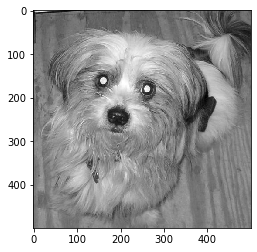

In [48]:
CATEGORIES=['Dog', 'Cat']
for category in CATEGORIES:
    path= os.path.join(DATADIR, category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [49]:
print(img_array)

[[ 80  78  96 ... 118 117 158]
 [ 63  58  64 ... 105 104 145]
 [ 61  64  67 ... 102 100 142]
 ...
 [122 122 122 ... 119 116 156]
 [124 124 124 ... 121 118 158]
 [127 128 128 ... 125 122 162]]


In [50]:
IMG_SIZE=50

In [51]:
new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

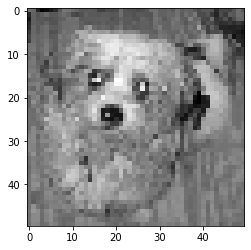

In [52]:
plt.imshow(new_array, cmap='gray')

In [53]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category) #path to cats or dogs dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
    

In [54]:
print(len(training_data))

24946


In [55]:
import random
random.shuffle(training_data)

In [56]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
1
1
0


In [72]:
X=[]
y=[]


In [73]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  

In [74]:
y=np.array(y)

In [75]:
import pickle
pickle_out= open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [76]:
pickle_in= open("X.pickle", "rb")
X=pickle.load(pickle_in)

In [77]:
X[2]

array([[[166],
        [ 53],
        [ 50],
        ...,
        [ 88],
        [ 83],
        [ 83]],

       [[166],
        [ 59],
        [ 52],
        ...,
        [ 82],
        [ 83],
        [ 77]],

       [[154],
        [ 54],
        [ 52],
        ...,
        [ 75],
        [ 71],
        [ 72]],

       ...,

       [[ 38],
        [ 40],
        [ 43],
        ...,
        [ 37],
        [ 68],
        [ 47]],

       [[ 48],
        [ 38],
        [ 34],
        ...,
        [ 71],
        [ 11],
        [ 18]],

       [[ 44],
        [  6],
        [ 54],
        ...,
        [ 37],
        [ 76],
        [ 30]]], dtype=uint8)

In [78]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## ConvNet

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X=pickle.load(open("X.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))
X=X/255.0

model= Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)
#model.fit(X, y, batch_size=32, validation_split= 0.1)

Epoch 1/3
546/546 [==============================] - 843s 2s/step - loss: 0.7006 - accuracy: 0.5402 - val_loss: 0.6525 - val_accuracy: 0.6179
Epoch 2/3
546/546 [==============================] - 738s 1s/step - loss: 0.6221 - accuracy: 0.6603 - val_loss: 0.5807 - val_accuracy: 0.7051
Epoch 3/3
546/546 [==============================] - 14685s 27s/step - loss: 0.5604 - accuracy: 0.7132 - val_loss: 0.5389 - val_accuracy: 0.7334
